<h1 style="text-align:center">AUTOENCODER</h1>

NAMA : GAYUH FIKRI KHUSNAELI

NIM : 21110024

In [ ]:
#ekstrak data zip
!unzip bulet_ae.zip
!unzip kotak_ae.zip

Streaming output truncated to the last 5000 lines.
  inflating: kotak/5500.png          
  inflating: kotak/5501.png          
  inflating: kotak/5502.png          
  inflating: kotak/5503.png          
  inflating: kotak/5504.png          
  inflating: kotak/5505.png          
  inflating: kotak/5506.png          
  inflating: kotak/5507.png          
  inflating: kotak/5508.png          
  inflating: kotak/5509.png          
  inflating: kotak/550.png           
  inflating: kotak/5510.png          
  inflating: kotak/5511.png          
  inflating: kotak/5512.png          
  inflating: kotak/5513.png          
  inflating: kotak/5514.png          
  inflating: kotak/5515.png          
  inflating: kotak/5516.png          
  inflating: kotak/5517.png          
  inflating: kotak/5518.png          
  inflating: kotak/5519.png          
  inflating: kotak/551.png           
  inflating: kotak/5520.png          
  inflating: kotak/5521.png          
  inflating: kotak/5522.png          

In [ ]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np

bulat = []
kotak = []

for i in glob.glob('bulet/*'):
  bulat.append(cv2.imread(i)[:,:,0]/255)
for i in glob.glob('kotak/*'):
  kotak.append(cv2.imread(i)[:,:,0]/255)

bulat = np.asarray(bulat).astype(float)
kotak = np.asarray(kotak).astype(float)

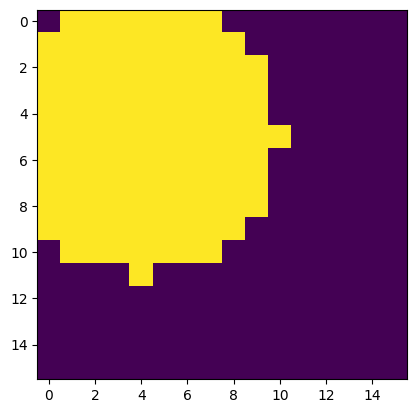

In [ ]:
plt.imshow(bulat[1])

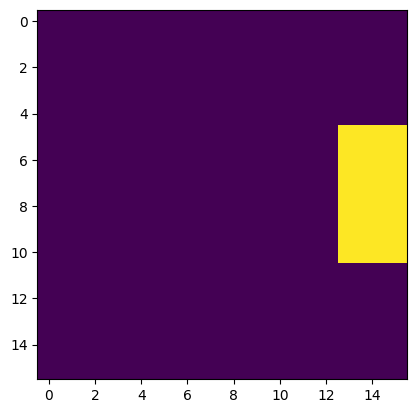

In [ ]:
plt.imshow(kotak[1])

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Reshape

size = 16

#ini adalah modul encoder utama yang dipergunakan
#baik oleh autoencoder pertama/kedua
enc = Sequential()
enc.add(Flatten())
enc.add(Dense(size*size, activation='relu'))

dec1 = Sequential()
dec1.add(Dense(size*size, activation='sigmoid'))
dec1.add(Reshape((size, size)))

dec2 = Sequential()
dec2.add(Dense(size*size, activation='sigmoid'))
dec2.add(Reshape((size, size)))

In [ ]:
# AutoEncoder 1

class AE1(Model):
  def __init__(self):
    super(AE1, self).__init__()
    self.enc = enc
    self.dec1 = dec1

  def call(self, x):
     return self.dec1(self.enc(x))

ae1 = AE1()
ae1.compile(optimizer='adam',loss='mse')

# AutoEncoder 2
class AE2(Model):
  def __init__(self):
    super(AE2, self).__init__()
    self.dec2 = dec2

  def call(self, x):
    return self.dec2(ae1.enc(x))

ae2 = AE2()
ae2.compile(optimizer='adam',loss='mse')

In [ ]:
#from keras.callsbacks import EarlyStopping
#callback = EarlyStopping(monitor='loss', patience=3)
ae1.fit(kotak, kotak, batch_size=2, epochs=10, validation_split=0.2)
print('Model AutoEncoder 2')
ae2.fit(bulat, bulat, batch_size=2, epochs=10, validation_split=0.2 )

Epoch 1/10
4000/4000 [==============================] - 13s 3ms/step - loss: 0.0021 - val_loss: 0.0023
Epoch 2/10
4000/4000 [==============================] - 11s 3ms/step - loss: 0.0020 - val_loss: 0.0024
Epoch 3/10
4000/4000 [==============================] - 11s 3ms/step - loss: 0.0020 - val_loss: 0.0022
Epoch 4/10
4000/4000 [==============================] - 11s 3ms/step - loss: 0.0019 - val_loss: 0.0022
Epoch 5/10
4000/4000 [==============================] - 10s 3ms/step - loss: 0.0019 - val_loss: 0.0022
Epoch 6/10
4000/4000 [==============================] - 11s 3ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 7/10
4000/4000 [==============================] - 11s 3ms/step - loss: 0.0019 - val_loss: 0.0025
Epoch 8/10
4000/4000 [==============================] - 11s 3ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 9/10
4000/4000 [==============================] - 12s 3ms/step - loss: 0.0018 - val_loss: 0.0025
Epoch 10/10
4000/4000 [==============================] - 10s 3ms/step - l

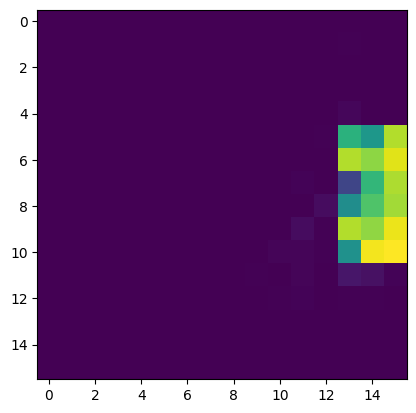

In [ ]:
latent = ae1.enc(kotak[1:2])
dec_ = ae2.dec2(latent)
plt.imshow(dec_[0])

In [ ]:
# plt.imshow(kotak[1])

In [ ]:
sidik = ae1.enc(kotak[10].reshape(1, 16, 16)).numpy()
decoded_imgs = ae1.dec1(sidik).numpy()

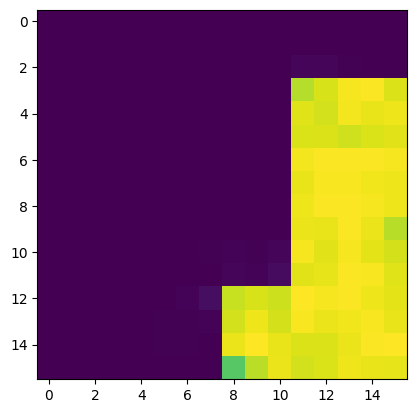

In [ ]:
plt.imshow(decoded_imgs[0])